In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import time
import numpy as np
import matplotlib.pyplot as plt               
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
driver = webdriver.Chrome('chromedriver.exe')

In [3]:
url = 'https://www.amazon.in/'
driver.get(url)

time.sleep(3)

searchlist = ['laptops', 'phones', 'headphones', 'smart watches', 'professional cameras', 
              'printers', 'monitors', 'home theater', 'router']

href = []

for i in searchlist:
    search_bar = driver.find_element_by_id('twotabsearchtextbox')
    search_bar.clear()
    search_bar.send_keys(i)

    search = driver.find_element_by_id('nav-search-submit-button')
    search.click()
    time.sleep(3)

    for i in range (3):
        get_href = driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]//a')
        nxt = driver.find_element_by_xpath('//li[@class="a-last"]')
            
        for i in get_href:
            href.append(i.get_attribute('href'))
        try:
            nxt.click()
        except:
            break
        time.sleep(2)



In [4]:
rating = []
review = []

for i in href:
    driver.get(i)
    time.sleep(3)
    
    try:
        allrevs = driver.find_element_by_xpath('//a[@class="a-link-emphasis a-text-bold"]')
        allrevs.click()
        time.sleep(3)
    
        rate = driver.find_element_by_xpath('//div[@class="a-column a-span3 star-rating-select"]')
        rate.click()
    
        for a in range (2,7):
            star = driver.find_element_by_xpath('//li[@class="a-dropdown-item star-filter-option"][' + str(a) + ']')
            star.click()
            time.sleep(2)
        
            review_tags = driver.find_elements_by_xpath('//span[@class="a-size-base review-text review-text-content"]')
            for x in review_tags:
                review.append(x.text)
                if (a==2):
                    stars = 5
                elif (a==3):
                    stars = 4
                elif (a==4):
                    stars = 3
                elif (a==5):
                    stars = 2
                else:
                    stars = 1
                rating.append(stars)
        
            try:
                nxt.click()
            except:
                pass
            rate.click()
            
    except:
        continue
print (review)
print (rating)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
len (rating)

20875

In [6]:
df = pd.DataFrame({})                                             #creating dataframe
df['Rating'] = rating
df['Review'] = review
df.to_csv('amazonrev.csv')
df

Rating                                             Review
0           5  The laptop came in excellent package - the pac...
1           5  I bought it on June 13 2021 at the price of 57...
2           5  Its superb\nIts world's lightest laptop\nSuper...
3           4  Ordered it a few days ago in the Amazon sale a...
4           5  Display and the design looks good. The blue li...
...       ...                                                ...
20870       1  Not as per specs\n1) Download speed between 40...
20871       1  I had to return two pieces within a day as bot...
20872       1  Connection drops every 5 to 10 minutes ... You...
20873       1  Very poor wifi signal. Waste if money router h...
20874       1  The router range is very bad. The 6 antennas a...

[20875 rows x 2 columns]

In [7]:
df.apply(lambda x: len(x.unique()))

Rating        5
Review    15253
dtype: int64

In [8]:
df.Rating.value_counts()

5    4780
1    4421
4    4280
3    3815
2    3579
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Data Distribution')

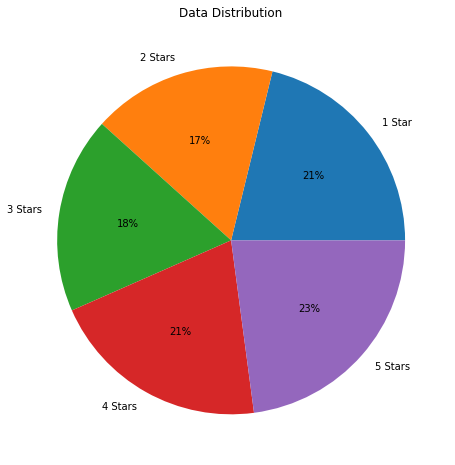

In [9]:
vals = [df.Rating[df.Rating==1].count() , df.Rating[df.Rating==2].count(), df.Rating[df.Rating==3].count(),
        df.Rating[df.Rating==4].count(), df.Rating[df.Rating==5].count()]
plt.figure(figsize = (15, 8))
label = ['1 Star' , '2 Stars', '3 Stars', '4 Stars', '5 Stars']
plt.pie(vals , labels=label , autopct = '%1.0f%%')
plt.title('Data Distribution')